In [ ]:
# !pip install yfinance

[*********************100%***********************]  2 of 2 completed


MultiIndex([( 'Close',  'AMD'),
            ( 'Close', 'NVDA'),
            (  'High',  'AMD'),
            (  'High', 'NVDA'),
            (   'Low',  'AMD'),
            (   'Low', 'NVDA'),
            (  'Open',  'AMD'),
            (  'Open', 'NVDA'),
            ('Volume',  'AMD'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])
Percentage Change over 6 months:
 Ticker
AMD    -20.561281
NVDA    14.592553
dtype: float64

Financial Metrics:
                           Stock   P/E Ratio  Forward P/E  Dividends  \
0  Advanced Micro Devices, Inc.  111.810000    17.663980        NaN   
1            NVIDIA Corporation   53.474308    30.435692     0.0003   

   Price to Book  Debt/Equity      ROE  
0       3.184472        3.927  0.03262  
1      77.574540       17.221  1.23767  
Normalized prices saved as 'normalized_prices.png' and correlation matrix saved.


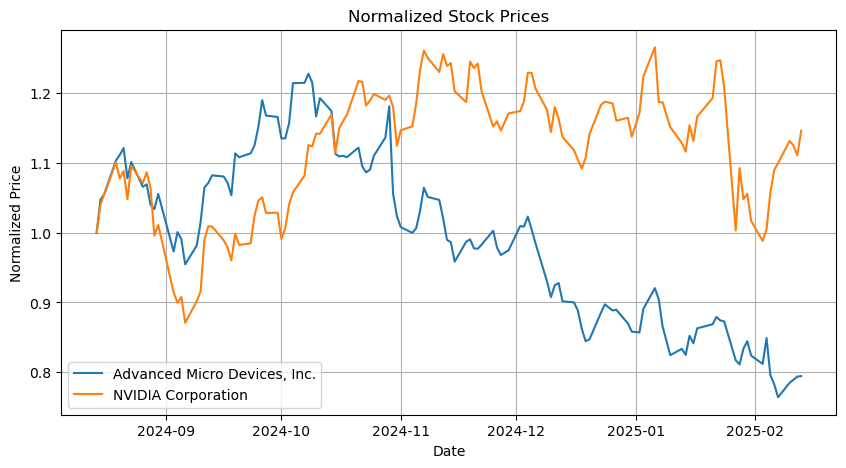

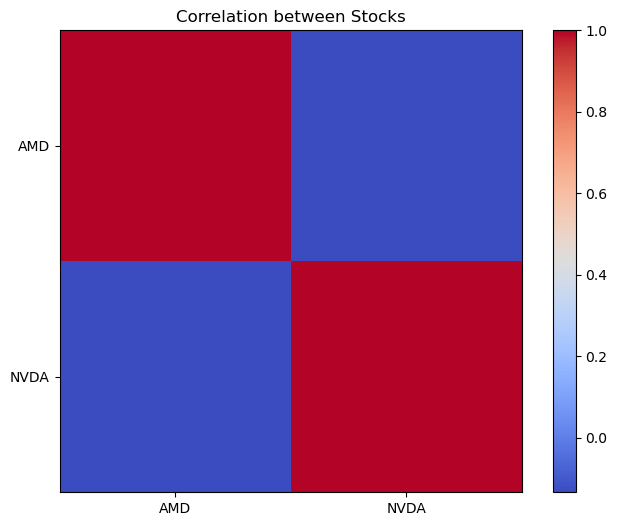

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock tickers and full names
stocks = {
    'AMD': 'Advanced Micro Devices, Inc.',
    'NVDA': 'NVIDIA Corporation'
}

# Download the historical data for the past 6 months
data = yf.download(list(stocks.keys()), period='6mo')

# Check the columns to confirm the structure
print(data.columns)

# Select 'Adj Close' from the multi-level columns
adj_close = data['Close']

# Calculate percentage change over the period
percentage_change = (adj_close.iloc[-1] - adj_close.iloc[0]) / adj_close.iloc[0] * 100

# Normalize the stock prices for plotting
normalized_data = adj_close / adj_close.iloc[0]

# Plot normalized prices
plt.figure(figsize=(10, 5))
for column in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data[column], label=stocks[column])
plt.title('Normalized Stock Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid()
plt.savefig('normalized_prices.png')

# Retrieve financial metrics
pe_ratios = []
forward_pe = []
dividends = []
price_to_book = []
debt_equity = []
roe = []

for ticker in stocks.keys():
    stock = yf.Ticker(ticker)
    info = stock.info
    pe_ratios.append(info.get('trailingPE', np.nan))
    forward_pe.append(info.get('forwardPE', np.nan))
    dividends.append(info.get('dividendYield', np.nan))
    price_to_book.append(info.get('priceToBook', np.nan))
    debt_equity.append(info.get('debtToEquity', np.nan))
    roe.append(info.get('returnOnEquity', np.nan))

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Stock': list(stocks.values()),
    'P/E Ratio': pe_ratios,
    'Forward P/E': forward_pe,
    'Dividends': dividends,
    'Price to Book': price_to_book,
    'Debt/Equity': debt_equity,
    'ROE': roe
})

print("Percentage Change over 6 months:\n", percentage_change)
print("\nFinancial Metrics:\n", metrics_df)

# Analyze the correlation between the stocks
correlation_matrix = normalized_data.corr()

# Create a figure for the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(stocks)), stocks.keys())
plt.yticks(range(len(stocks)), stocks.keys())
plt.title('Correlation between Stocks')
plt.savefig('correlation_matrix.png')

print("Normalized prices saved as 'normalized_prices.png' and correlation matrix saved.")

In [ ]:
!pip show yfinance

In [ ]:
!pip install --upgrade yfinance==0.2.54

In [84]:
!pip show yfinance

Name: yfinance
Version: 0.2.54
Summary: Download market data from Yahoo! Finance API
Home-page: https://github.com/ranaroussi/yfinance
Author: Ran Aroussi
Author-email: ran@aroussi.com
License: Apache
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: beautifulsoup4, frozendict, multitasking, numpy, pandas, peewee, platformdirs, pytz, requests
Required-by: 


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Define the stock symbols
stock_symbol = "ICICIBANK.NS"

# Download stock data for the last 6 months
data = yf.download(stock_symbol, period="6mo")['Close']
data

[*********************100%***********************]  1 of 1 completed


Ticker,ICICIBANK.NS
Date,
2024-09-13,1250.349976
2024-09-16,1262.849976
2024-09-17,1268.099976
2024-09-18,1288.349976
2024-09-19,1292.000000
...,...
2025-03-07,1214.550049
2025-03-10,1214.849976
2025-03-11,1245.400024


In [29]:
data.columns

Index(['ICICIBANK.NS'], dtype='object', name='Ticker')

In [31]:
data.index

DatetimeIndex(['2024-09-13', '2024-09-16', '2024-09-17', '2024-09-18',
               '2024-09-19', '2024-09-20', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26',
               ...
               '2025-02-28', '2025-03-03', '2025-03-04', '2025-03-05',
               '2025-03-06', '2025-03-07', '2025-03-10', '2025-03-11',
               '2025-03-12', '2025-03-13'],
              dtype='datetime64[ns]', name='Date', length=126, freq=None)

In [33]:
data.iloc[-1]

Ticker
ICICIBANK.NS    1250.050049
Name: 2025-03-13 00:00:00, dtype: float64

In [21]:
# Define stocks
stocks = ['HDFCBANK.NS', 'ICICIBANK.NS']

# Fetch data
stocks_data = yf.download(stocks, start='2024-09-14', end='2025-03-14')['Close']
stocks_data

[*********************100%***********************]  2 of 2 completed


Ticker,HDFCBANK.NS,ICICIBANK.NS
Date,,
2024-09-16,1670.949951,1262.849976
2024-09-17,1668.800049,1268.099976
2024-09-18,1694.800049,1288.349976
2024-09-19,1708.500000,1292.000000
2024-09-20,1741.199951,1338.449951
...,...,...
2025-03-07,1689.250000,1214.550049
2025-03-10,1687.500000,1214.849976
2025-03-11,1685.500000,1245.400024


In [23]:
stocks_data.columns

Index(['HDFCBANK.NS', 'ICICIBANK.NS'], dtype='object', name='Ticker')

In [25]:
stocks_data.iloc[0]

Ticker
HDFCBANK.NS     1670.949951
ICICIBANK.NS    1262.849976
Name: 2024-09-16 00:00:00, dtype: float64

In [61]:
# Check for NaN values and re-query if necessary
# if data['Close'].isna().sum() == len(data):
if data.isnull().all().any():
    raise ValueError("Data contains all NaN values. Please check the stock symbol.")

In [45]:
# Check for NaN values and re-query if necessary
# if data['Close'].isna().sum() == len(data):
if stocks_data.isna().all():
    raise ValueError("Data contains all NaN values. Please check the stock symbol.")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
stocks_data.isna().all()

Ticker
HDFCBANK.NS     False
ICICIBANK.NS    False
dtype: bool

In [55]:
data.isna().all().any()

False

In [ ]:
# Get the latest price and performance
current_price = data['Close'].iloc[-1]
six_month_price = data['Close'].iloc[0]
percentage_change = ((current_price - six_month_price) / six_month_price) * 100

# Financial Metrics - using yfinance for fetching the info
stock_info = yf.Ticker(stock_symbol).info
financial_metrics = {
    "P/E Ratio": stock_info.get("trailingPE"),
    "Forward P/E": stock_info.get("forwardPE"),
    "Dividends": stock_info.get("dividendYield"),
    "Price to Book": stock_info.get("priceToBook"),
    "Debt/Equity": stock_info.get("debtToEquity"),
    "ROE": stock_info.get("returnOnEquity")
}

# Print retrieved data
print(f"Current Price: {current_price}")
print(f"6 Month Price: {six_month_price}")
print(f"Percentage Change: {percentage_change:.2f}%")
for metric, value in financial_metrics.items():
    print(f"{metric}: {value}")

# Normalizing the prices
normalized_prices = data['Close'] / data['Close'].iloc[0]
plt.figure(figsize=(12, 6))
plt.plot(normalized_prices, label="Normalized Price")
plt.title(f"Normalized Price of {stock_symbol} Over Last 6 Months")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid()
plt.savefig('normalized_prices.png')
